Question #1:
How many tennis players are included in dataset?
Answer: Creating CSV file from Dataset.

In [10]:
import pandas as pd
from glob import glob
import pyarrow.parquet as pq
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

####### PLEASE Make sure to read the comment lines for importing the required data from the dataset!
# !!!!!!!!!!  (READ COMMENT LINES)


# #### Reading required data from Dataset and saving into a csv file.
# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"home_team_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# Home_team_df =pd.concat([pd.read_parquet(f,columns=['match_id','full_name','height']) for f in file_paths ],ignore_index=True)

# pattern = re.compile(r"away_team_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# away_team_df =pd.concat([pd.read_parquet(f,columns=['match_id','full_name','height']) for f in file_paths ],ignore_index=True)

# All_players=pd.concat([Home_team_df,away_team_df])
# All_players.to_csv('./home_away_players.csv',index=False)

All_players=pd.read_csv('home_away_players-Q1-2.csv')
display(All_players.drop_duplicates().head())
Number_of_Players=pd.concat([All_players['Full_name_Home'],All_players['Full_name_Away']])
Number_of_Players=len(Number_of_Players.dropna().unique())
# Number_of_Players=len(All_players['full_name'].unique())
print(f'The number of players is: {Number_of_Players}')

,match_id,Full_name_Home,Height_Home,Full_name_Away,Height_Away
0,11998445,"Cazaux, Arthur",1.83,"Auger-Aliassime, Felix",1.93
4,11998446,"Lestienne, Constant",1.80,Flavio Cobolli,1.83
8,11998447,"Ćorić, Borna",1.88,"Martinez, Pedro",1.85
12,11998448,"Mmoh, Michael",1.88,"Muller, Alexandre",1.83
13,11998449,"Paire, Benoit",1.96,"Mayot, Harold",1.78


The number of players is: 2651


Question #2: what is the average height of the players?

In [11]:

All_players.drop_duplicates(inplace=True)
All_players

home = All_players[['Full_name_Home', 'Height_Home']].rename(columns={'Full_name_Home': 'Full_name', 'Height_Home': 'Height'})
away = All_players[['Full_name_Away', 'Height_Away']].rename(columns={'Full_name_Away': 'Full_name', 'Height_Away': 'Height'})

# Concatenate vertically
Height_All_players = pd.concat([home, away], ignore_index=True)
display(Height_All_players.dropna())
All_players_height_Ave=Height_All_players['Height'].dropna().mean()
print(f'The Average height of the players is: ' + str(round(All_players_height_Ave,2)) + ' cm')

,Full_name,Height
0,"Cazaux, Arthur",1.83
1,"Lestienne, Constant",1.80
2,"Ćorić, Borna",1.88
3,"Mmoh, Michael",1.88
4,"Paire, Benoit",1.96
...,...,...
28518,"Simonit, Ezequiel",1.75
28519,"Doria, Luciano",1.80
28520,"Soriano Barrera, Adria",1.91
28522,"Taberner, Carlos",1.83


The Average height of the players is: 1.82 cm


Question #3: Which player has the highest number of wins?

In [13]:
# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"event_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# df =pd.concat([pd.read_parquet(f,columns=['match_id','winner_code']) for f in file_paths ],ignore_index=True)

# merged=df.merge(All_players, how='inner', on='match_id')

# merged.to_csv('./Winners-Q3.csv',index=False)


Winners=pd.read_csv('./Winners-Q3.csv')
display(Winners)
Wins=Winners['winner'].dropna().value_counts().reset_index()

Wins.columns = ['Player', 'Number_of_Wins']
display(Wins)
print(f"{Wins['Player'][0]} has the most wins, with {Wins['Number_of_Wins'][0]} victories.")

,match_id,Full_name_Home,Height_Home,Full_name_Away,Height_Away,winner_code,winner
0,11998445,"Cazaux, Arthur",1.83,"Auger-Aliassime, Felix",1.93,2.0,"Auger-Aliassime, Felix"
1,11998446,"Lestienne, Constant",1.80,Flavio Cobolli,1.83,2.0,Flavio Cobolli
2,11998447,"Ćorić, Borna",1.88,"Martinez, Pedro",1.85,1.0,"Ćorić, Borna"
3,11998448,"Mmoh, Michael",1.88,"Muller, Alexandre",1.83,1.0,"Mmoh, Michael"
4,11998449,"Paire, Benoit",1.96,"Mayot, Harold",1.78,2.0,"Mayot, Harold"
...,...,...,...,...,...,...,...
15665,12213458,"Gorokhov, Mikhail",NaN,"Simonsson, Fred",1.88,2.0,"Simonsson, Fred"
15666,12213459,"Zhu, Michael",1.75,"Lumsden, Ewen",NaN,1.0,"Zhu, Michael"
15667,12213460,"Ojakaar, Oliver",1.91,NaN,NaN,1.0,"Ojakaar, Oliver"
15668,12213482,"Baldovinetti, Guelfo",NaN,NaN,NaN,1.0,"Baldovinetti, Guelfo"


,Player,Number_of_Wins
0,"Popko, Dmitry",32
1,"Faria, Jaime",26
2,"Chidekh, Clement",26
3,"Helgo, Malene",24
4,"Jianu, Filip Cristian",23
...,...,...
2417,"Dahlin, Max",1
2418,"Freund, Simon",1
2419,"Deatherage, Mary Boyce",1
2420,"Doldan, Heydi",1


Popko, Dmitry has the most wins, with 32 victories.


Question #4:What is the longest match recorded in terms of duration?

In [34]:
import pandas as pd
from datetime import timedelta

match_df = pd.read_csv('question4.csv')
longest_match = match_df.loc[match_df['total_duration'].idxmax()]
match_id = int(longest_match['match_id'])
total_seconds = int(longest_match['total_duration'])
formatted_duration = str(timedelta(seconds=total_seconds))
away_df = pd.read_csv('away_team_cleaned.csv')
home_df = pd.read_csv('home_team_cleaned.csv')
away_players = away_df.loc[away_df['match_id'] == match_id, 'full_name'].values
home_players = home_df.loc[home_df['match_id'] == match_id, 'full_name'].values

# Display results
print(f"Longest Match ID: {match_id}")
print(f"Total Duration: {formatted_duration}")

if away_players.size > 0 and home_players.size > 0:
    print(f"Away Player: {away_players[0]}")
    print(f"Home Player: {home_players[0]}")
else:
    print("⚠️ Player names not found for this match ID.")

Longest Match ID: 12151527
Total Duration: 4:40:13
Away Player: Radwańska, Urszula
Home Player: Paganetti, Vittoria


Question #5:How many sets are typically played in a tennis match?

mean number of sets played in tennis match: 2.3001860382707298


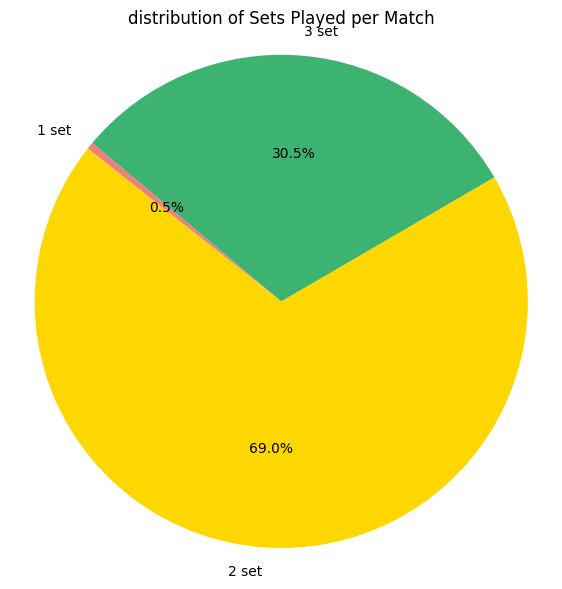

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'question5_final.csv'
df = pd.read_csv(file_path)
mean_sets = df['sets_played'].mean()
print(f"mean number of sets played in tennis match:",mean_sets)
set_counts = df['sets_played'].value_counts().sort_index()
filtered_counts = set_counts[set_counts.index.isin([1, 2, 3])]

labels = [f"{int(k)} set" for k in filtered_counts.index]
sizes = filtered_counts.values
colors = ['lightcoral', 'gold', 'mediumseagreen']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('distribution of Sets Played per Match')
plt.axis('equal')
plt.show()

Question #6:Which country has produced the most successful tennis players?

In [36]:
import pandas as pd
df = pd.read_csv('question6.csv')
country_wins = df.groupby('country')['win_count'].sum().reset_index()
country_wins = country_wins.sort_values(by='win_count', ascending=False)
country_wins.to_csv('question6_country_ranking.csv', index=False)
print("Countries Ranked by Total Match Wins:")
print(country_wins.head())
print("\n\nthe most successful is: \n",country_wins.head(1))
print("we based the best country on the highest number of wins that each country had.")

Countries Ranked by Total Match Wins:
    country  win_count
30   France       1115
42    Italy       1069
89      USA        959
74   Russia        701
32  Germany        597


the most successful is: 
    country  win_count
30  France       1115
we based the best country on the highest number of wins that each country had.


Question #7:What is the average number of aces per match?

In [19]:
import pandas as pd
import pyarrow.parquet as pq
from glob import glob
import os


# file_paths = []
# required_dates = ['20240201','20240331']
# for date in required_dates:
#     path = glob(f'./tennis_data/{date}/data/raw/raw_point_by_point_parquet/pbp_*.parquet')
#     file_paths.extend(path)

# first_df = pd.concat(pd.read_parquet(f , columns=['match_id','point_description']) for f in file_paths)
# first_df.to_csv('pd.csv',index=False)

df = pd.read_csv('pd.csv')
df['is_aces'] = (df['point_description'] == 1).astype(int)
aces_df = df[df['is_aces'] == 1 ].copy()
aces_summary = aces_df.groupby('match_id').size().reset_index(name='total_aces')
total_points = df.groupby('match_id').size().reset_index(name='total_points')
summary = aces_summary.merge(total_points, on='match_id', how='left')
summary['ace_ratio'] = summary['total_aces'] / summary['total_points']
aces_df = aces_df.merge(summary, on='match_id', how='left')


aces_df.to_csv('aces_only.csv' , index=False)
summary.to_csv('aces_summary.csv' , index=False , encoding='utf-8-sig')
print(aces_df)
print('\nSummary per match (only matches with >=1 ace):')
print(summary)

      match_id  point_description  is_aces  total_aces  total_points  \
0     11998445                  1        1          12           159   
1     11998445                  1        1          12           159   
2     11998445                  1        1          12           159   
3     11998445                  1        1          12           159   
4     11998445                  1        1          12           159   
...        ...                ...      ...         ...           ...   
2573  12213460                  1        1           5            99   
2574  12213460                  1        1           5            99   
2575  12213484                  1        1           1           104   
2576  12213486                  1        1           1           100   
2577  12213803                  1        1           1           114   

      ace_ratio  
0      0.075472  
1      0.075472  
2      0.075472  
3      0.075472  
4      0.075472  
...         ...  
2573   0.

Question #8:Is there a difference in the number of double faults based on gender?

,match_id,double_faults,full_name,gender
0,11998445,9,"Auger-Aliassime, Felix",M
2,11998445,9,"Cazaux, Arthur",M
4,11998445,9,"Auger-Aliassime, Felix",M
6,11998446,2,Flavio Cobolli,M
8,11998446,2,"Lestienne, Constant",M
...,...,...,...,...
3387,12213459,8,"Zhu, Michael",M
3389,12213459,8,"Lumsden, Ewen",M
3392,12213460,6,"Ojakaar, Oliver",M
3396,12213482,4,"Baldovinetti, Guelfo",M


Sum of doubl faults based on gender :
  gender  double_faults
0      F           4961
1      M           4125


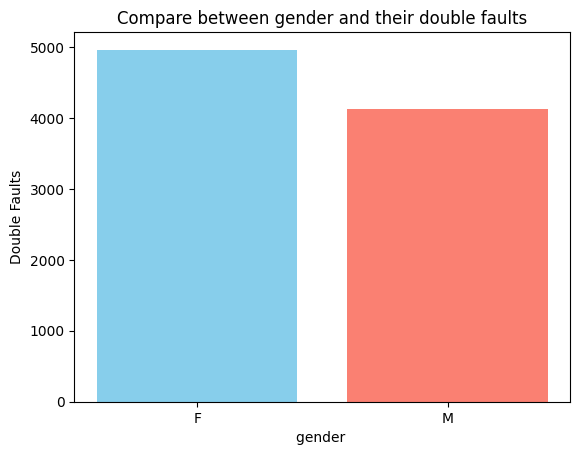

In [45]:
import pandas as pd
import pyarrow.parquet as pq
from glob import glob
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, shapiro


pbp_df = pd.read_csv('pd.csv')
all_df = pd.read_csv('allplayers.csv')
double_faults = pbp_df[pbp_df['point_description'] == 2]
df_faults = double_faults.groupby("match_id").size().reset_index(name = "double_faults")

total_df = df_faults.merge(all_df, on="match_id", how="left")
display(total_df.dropna())
double_faults = pbp_df[pbp_df['point_description'] == 2]
df_faults = double_faults.groupby("match_id").size().reset_index(name="double_faults")
gender_faults = total_df.groupby("gender")["double_faults"].sum().reset_index()

print("Sum of doubl faults based on gender :")
print(gender_faults)

fig = plt.plot(fiqsize= (6,4))
plt.bar(gender_faults["gender"], gender_faults["double_faults"], color=["skyblue","salmon"])
plt.xlabel("gender ")
plt.ylabel("Double Faults")
plt.title("Compare between gender and their double faults")
plt.show()

Question #9:Which player has won the most tournaments in a single month?

In [37]:
import pandas as pd
import numpy as np
from pathlib import Path
feb_event = pd.read_csv('february_event_parquet.csv', usecols=['match_id', 'winner_code'], dtype=str)
feb_home = pd.read_csv('February_home_team_parquet.csv', usecols=['match_id', 'full_name'], dtype=str)
feb_away = pd.read_csv('february_away_team_parquet.csv', usecols=['match_id', 'full_name'], dtype=str)
mar_event = pd.read_csv('march_event_parquet.csv', usecols=['match_id', 'winner_code'], dtype=str)
mar_home = pd.read_csv('march_home_team_parquet.csv', usecols=['match_id', 'full_name'], dtype=str)
mar_away = pd.read_csv('march_away_team_parquet.csv', usecols=['match_id', 'full_name'], dtype=str)
for df in [feb_event, feb_home, feb_away, mar_event, mar_home, mar_away]:
    df['match_id'] = df['match_id'].astype(str).str.strip().str.lower()
feb_home['full_name'] = feb_home['full_name'].astype(str).str.strip()
feb_away['full_name'] = feb_away['full_name'].astype(str).str.strip()
mar_home['full_name'] = mar_home['full_name'].astype(str).str.strip()
mar_away['full_name'] = mar_away['full_name'].astype(str).str.strip()


def clean_events(events_df):
    df = events_df[events_df['winner_code'].notna()]
    df = df[df['winner_code'].str.strip().isin(['1.0', '2.0'])]
    df['winner_code'] = df['winner_code'].astype(float).astype(int).astype(str)
    return df

feb_event = clean_events(feb_event)
mar_event = clean_events(mar_event)
def merge_players(events_df, home_df, away_df):
    df = events_df.merge(home_df, on='match_id', how='left')
    df = df.merge(away_df, on='match_id', how='left', suffixes=('', '_away'))
    df['winner_name'] = np.where(
        df['winner_code'] == '1',
        df['full_name'],
        np.where(df['winner_code'] == '2', df['full_name_away'], np.nan)
    )
    return df
feb_merged = merge_players(feb_event, feb_home, feb_away)
mar_merged = merge_players(mar_event, mar_home, mar_away)


def count_winners(df, month):
    valid = df[df['winner_name'].notna() & (df['winner_name'] != "NG")]
    counts = valid['winner_name'].value_counts().reset_index()
    counts.columns = ['full_name', 'win_count']
    counts['month'] = month
    return counts
feb_counts = count_winners(feb_merged, 'February')
mar_counts = count_winners(mar_merged, 'March')

if not feb_counts.empty:
    top_feb = feb_counts.iloc[0]
    print(f"\nTop player in February: {top_feb['full_name']} with {top_feb['win_count']} wins")
else:
    print("\nNo valid winners found in February.")

if not mar_counts.empty:
    top_mar = mar_counts.iloc[0]
    print(f"\nTop player in March: {top_mar['full_name']} with {top_mar['win_count']} wins")
else:
    print("\nNo valid winners found in March.")
    
print("the best winner for each month is based on the highest number of wins")


Top player in February: Chidekh, Clement with 190 wins

Top player in March: Estable, Julieta with 243 wins
the best winner for each month is based on the highest number of wins


Question #10: Is there a correlation between a player's height and their ranking?

,full_name,country,height,plays,current_rank,gender
0,"Cazaux, Arthur",France,1.83,right-handed,86.0,NaN
1,"Lestienne, Constant",France,1.80,right-handed,99.0,NaN
2,"Ćorić, Borna",Croatia,1.88,right-handed,31.0,NaN
3,"Mmoh, Michael",USA,1.88,right-handed,122.0,NaN
4,"Paire, Benoit",France,1.96,right-handed,110.0,NaN
...,...,...,...,...,...,...
49808,"Doria, Luciano",Argentina,1.80,right-handed,1442.0,M
49809,"Soriano Barrera, Adria",Colombia,1.91,right-handed,465.0,M
49810,"Taberner, Carlos",Spain,1.83,right-handed,358.0,M
49811,"Simonsson, Fred",Sweden,1.88,right-handed,NaN,M


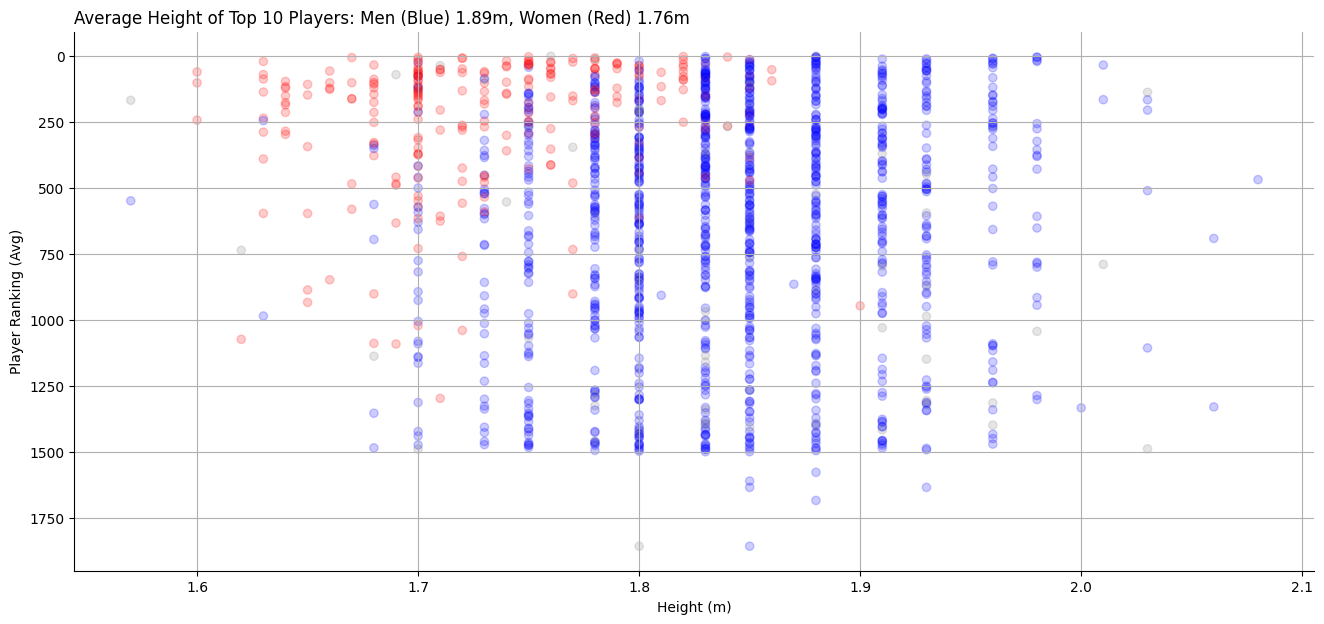

,height,current_rank
count,16.000000,16.000000
mean,1.760000,10.450625
std,0.052789,5.885652
min,1.670000,2.000000
25%,1.720000,5.750000
50%,1.750000,9.225000
75%,1.790000,15.510000
max,1.850000,19.890000


In [22]:
# # file_paths=[]
# # required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# # required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# # pattern = re.compile(r"home_team_\d+\.parquet")
# # file_paths = []

# # for date in required_dates:
# #     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
# #     matched_files = [f for f in all_files if pattern.search(f)]
# #     file_paths.extend(matched_files)

# # used_col=['full_name','country','height','plays','current_rank']
# # Home_team_df =pd.concat([pd.read_parquet(f,columns=used_col) for f in file_paths ],ignore_index=True)

# # file_paths=[]
# # required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# # required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# # pattern = re.compile(r"away_team_\d+\.parquet")
# # file_paths = []

# # for date in required_dates:
# #     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
# #     matched_files = [f for f in all_files if pattern.search(f)]
# #     file_paths.extend(matched_files)

# # used_col=['full_name','gender','country','height','plays','current_rank']
# # Away_team_df =pd.concat([pd.read_parquet(f,columns=used_col) for f in file_paths ],ignore_index=True)


# # players_info_df = pd.concat([Home_team_df, Away_team_df])
# # players_info_df.to_csv('./Players-info-Q10-13-15.csv',index=False)

players_info_df=pd.read_csv('./Players-info-Q10-13-15.csv')
display(players_info_df)

players_height_rank_df=players_info_df[['full_name','gender','height','current_rank']]
# players_height_rank_df.groupby('full_name').mean('current_rank').round(2)

# players_height_rank_df.groupby('full_name')['current_rank'].mean().sort_values()
# players_height_rank_df.loc[players_height_rank_df['full_name']=='Xiao, Zheng Hua']
players_height_avg_rank = (
    players_height_rank_df.groupby('full_name', as_index=False)
      .agg({
          'height': 'first',           # keep first height
          'gender': 'first',           # keep first gender
          'current_rank': 'mean'       # average the rank
      })
      .round(2)
)

players_height_avg_rank['color'] = players_height_avg_rank['gender'].map({
    'M': 'blue',
    'F': 'red'
}).fillna('gray')

fig,ax = plt.subplots(figsize=(16,7))
ax.scatter(x=players_height_avg_rank['height'],
           y=players_height_avg_rank['current_rank'],
           c=players_height_avg_rank['color'],alpha=0.2)
plt.gca().invert_yaxis()
ax.spines[['right','top']].set_visible(False)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Player Ranking (Avg)')
ax.set_title('Average Height of Top 10 Players: Men (Blue) 1.89m, Women (Red) 1.76m',loc='left')
ax.grid(True)
plt.show()

players_height_avg_rank.loc[players_height_avg_rank['height'].isnull()]
Top_20_men=players_height_avg_rank[(players_height_avg_rank['current_rank']<20) & (players_height_avg_rank['gender']=='M')]
Top_20_women=players_height_avg_rank[(players_height_avg_rank['current_rank']<20) & (players_height_avg_rank['gender']=='F')]
Top_20_men.describe()
Top_20_women.describe()

Question #11:What is the average duration of matches?

In [38]:
import pandas as pd
from datetime import timedelta
file_path = 'question4_final.csv'
df = pd.read_csv(file_path)
df['total_duration'] = pd.to_numeric(df['total_duration'], errors='coerce')
mean_duration_seconds = df['total_duration'].mean()
mean_duration_formatted = str(timedelta(seconds=round(mean_duration_seconds)))
print(f"Average match duration: {mean_duration_formatted} (HH:MM:SS)")

Average match duration: 1:05:22 (HH:MM:SS)


Question #12:What is the average number of games per set in men's matches compared to women's
matches?

In [39]:
import pandas as pd
import pyarrow.parquet as pq
from glob import glob
import os

# file_paths = []
# required_dates = ['20240201','20240331']
# for date in required_dates:
#     path = glob(f'./tennis_data/{date}/data/raw/raw_match_parquet/away_team_*.parquet')
#     file_paths.append(path)

# awayT_df = pd.concat([pd.read_parquet(f , columns=['match_id','full_name','gender']) for f in file_paths] , ignore_index=True)

# for date in required_dates:
#     path = glob(f'./tennis_data/{date}/data/raw/raw_match_parquet/home_team_*.parquet')
#     file_paths.append(path)

# homeT_df = pd.concat([pd.read_parquet(f , columns=['match_id','full_name','gender']) for f in file_paths] , ignore_index=True)
# all_players=pd.concat([homeT_df,awayT_df],ignore_index=True)
# all_players.to_csv('allplayers.csv', index=False)
# file_paths = []
# required_dates = ['20240201','20240331']
# for date in required_dates:
#     path = glob(f'./tennis_data/{date}/data/raw/raw_point_by_point_parquet/pbp_*.parquet')
#     file_paths.append(path)

# game_df = pd.concat(pd.read_parquet(f , columns=['match_id','set_id','game_id']) for f in file_paths)
# game_df.to_csv('games.csv',index=False)

df = pd.read_csv('games.csv')
all_df= pd.read_csv('allplayers.csv')
games_per_set = (
    df.groupby(["match_id", "set_id"])["game_id"]
    .nunique()
    .reset_index(name="games_per_set")
)

merged_df = games_per_set.merge(all_df[["match_id", "gender"]], on="match_id")
avg_games = merged_df.groupby("gender")["games_per_set"].mean()

print(avg_games)

gender
F    8.998882
M    9.255474
Name: games_per_set, dtype: float64


Question #13: What is the distribution of left-handed versus right-handed players?

C:\Users\fatemeh\AppData\Local\Temp\ipykernel_30020\4202779004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_hand_df.fillna('Not mentioned',inplace=True)
C:\Users\fatemeh\AppData\Local\Temp\ipykernel_30020\4202779004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_hand_df.drop_duplicates(inplace=True)


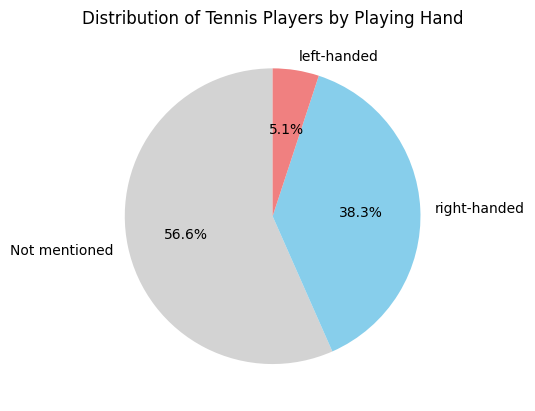

In [40]:
players_info_df=pd.read_csv('./Players-info-Q10-13-15.csv')
players_hand_df=players_info_df[['full_name','plays']]
players_hand_df.fillna('Not mentioned',inplace=True)
players_hand_df.drop_duplicates(inplace=True)
players_hand=players_hand_df['plays'].value_counts(normalize=True).mul(100)
# players_hand.describe()
players_hand
plt.pie(
    players_hand,
    labels=players_hand.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgray', 'skyblue', 'lightcoral']
)
plt.title('Distribution of Tennis Players by Playing Hand')
plt.show()



Question #14:What is the most common type of surface used in tournaments?

In [47]:
import pandas as pd
import pyarrow.parquet as pq
from glob import glob
import os


# file_paths = []
# required_dates = ['20240201','20240331']
# for date in required_dates:
#     path = glob(f'./tennis_data/{date}/data/raw/raw_match_parquet/tournament_*.parquet')
#     file_paths.extend(path)

# first_df = pd.concat(pd.read_parquet(f , columns=["ground_type"]) for f in file_paths)
# first_df.to_csv('groundtype.csv',index=False)

df = pd.read_csv('groundtype.csv')
surface_df = (
    df['ground_type']
    .value_counts(dropna=True)
    .reset_index(name='surface')
    .rename(columns={'ground_type': 'count'})
)
print(f"Most common surface: {surface_df.loc[0, 'index']} ({surface_df.loc[0, 'surface']})")
# surface = df['ground_type'].value_counts().sort_values(ascending=False)
# print ("Surface types with their counts :\n")
# for surface , count in surface.items():
#     print(f" {surface :} : {count}")

Most common surface: Red clay (529)


Question #15:How many distinct countries are represented in the dataset?

In [42]:
#Country= Players+Venue
players_info_df=pd.read_csv('./Players-info-Q10-13-15.csv')
players_country=pd.DataFrame(players_info_df['country'].unique()).rename(columns={0:'country'})

## IMPORTING DATA

# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"venue_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# venue =pd.concat([pd.read_parquet(f,columns=['country']) for f in file_paths ],ignore_index=True)
# venue_country=venue
# countries = pd.concat([players_country, venue_country]).reset_index(drop=True)
# All_Countries=countries.dropna().drop_duplicates()
# All_Countries.to_csv('./All_countries-Q15.csv')
All_Countries=pd.read_csv('./All_countries-Q15.csv')
Num_Countries=len(All_Countries['country'])
print(f'There are {Num_Countries} distinct countries in the dataset')

There are 108 distinct countries in the dataset


Question #16:Which player has the highest winning percentage against top 10 ranked opponents?

In [43]:
## IMPORTING DATA

# # file_paths=[]
# # required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# # required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# # pattern = re.compile(r"home_team_\d+\.parquet")
# # file_paths = []

# # for date in required_dates:
# #     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
# #     matched_files = [f for f in all_files if pattern.search(f)]
# #     file_paths.extend(matched_files)

# # Home_team_df =pd.concat([pd.read_parquet(f,columns=['match_id','full_name','current_rank']) for f in file_paths ],ignore_index=True)

# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"away_team_\d+\.parquet")
# file_paths = []
# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# away_team_df =pd.concat([pd.read_parquet(f,columns=['match_id','full_name','current_rank']) for f in file_paths],ignore_index=True)

# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"event_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# win_codes =pd.concat([pd.read_parquet(f,columns=['match_id','winner_code']) for f in file_paths ],ignore_index=True)

## MERGING DATA
# matches=Home_team_df.merge(away_team_df,how='outer',on='match_id')
# matches.columns = ['match_id','full_name_home','current_rank_home','full_name_away','current_rank_away']

# Winner_Matches=matches.merge(win_codes,how='inner', on='match_id')
# Winner_Matches.drop_duplicates(inplace=True)
# Winner_Matches['Winner']=np.where(Winner_Matches['winner_code']==1,Winner_Matches['full_name_home'],Winner_Matches['full_name_away'])
# Winner_Matches.to_csv('./Winner-Q16.csv')
Winner_Matches=pd.read_csv('./Winner-Q16.csv')
Top10_Winner_Matches=Winner_Matches.loc[(Winner_Matches['current_rank_home']<=10) | (Winner_Matches['current_rank_away']<=10)]
display(Top10_Winner_Matches)
Home_top10_Winners = Top10_Winner_Matches[Top10_Winner_Matches['current_rank_away'] <= 10][['match_id','full_name_home']].rename(columns={'full_name_home':'full_name'})
Away_top10_Winners = Top10_Winner_Matches[Top10_Winner_Matches['current_rank_home'] <= 10][['match_id','full_name_away']].rename(columns={'full_name_away':'full_name'})
All_top10_Win=pd.concat([Home_top10_Winners,Away_top10_Winners])
Winner_All_top10_Win=All_top10_Win.merge(Top10_Winner_Matches[['match_id','Winner']],how='inner',on='match_id')
Winner_All_top10_Win.drop_duplicates(inplace=True)
Name_Win_Winner_All_top10=Winner_All_top10_Win.groupby('full_name')['match_id'].count()
Num_Win_Winner_All_top10=Winner_All_top10_Win[Winner_All_top10_Win['full_name']==Winner_All_top10_Win['Winner']].groupby('full_name')['match_id'].count()
Win_Winner_All_top10_df=pd.DataFrame({
    'matches_played': Name_Win_Winner_All_top10,
    'wins': Num_Win_Winner_All_top10
})
Win_Winner_All_top10_df.fillna(0,inplace=True)
Win_Winner_All_top10_df['Win_Percentage']=(Win_Winner_All_top10_df['wins']/Win_Winner_All_top10_df['matches_played']).mul(100)
Win_Winner_All_top10_df.sort_values('wins',ascending=False)

,Unnamed: 0,match_id,full_name_home,current_rank_home,full_name_away,current_rank_away,winner_code,Winner
10,10,11998454,"Rune, Holger",7.0,"Mmoh, Michael",122.0,1.0,"Rune, Holger"
16,16,11998457,"Rune, Holger",7.0,"Ćorić, Borna",31.0,2.0,"Ćorić, Borna"
18,18,11998459,"Rune, Holger",7.0,"Llamas Ruiz, Pablo",151.0,1.0,"Rune, Holger"
135,135,12002055,"Ostapenko, Jelena",10.0,"Tauson, Clara",92.0,1.0,"Ostapenko, Jelena"
138,138,12002059,"Ostapenko, Jelena",10.0,"Burrage, Jodie",86.0,1.0,"Ostapenko, Jelena"
...,...,...,...,...,...,...,...,...
19290,19290,12159561,"Rublev, Andrey",6.0,"Machač, Tomáš",60.0,2.0,"Machač, Tomáš"
19291,19291,12159562,"Fucsovics, Marton",86.0,"Medvedev, Daniil",4.0,2.0,"Medvedev, Daniil"
19298,19298,12159570,"Zverev, Alexander",5.0,"Auger-Aliassime, Felix",36.0,1.0,"Zverev, Alexander"
19299,19299,12159571,"Shevchenko, Alexander",58.0,"Hurkacz, Hubert",9.0,2.0,"Hurkacz, Hubert"


,matches_played,wins,Win_Percentage
full_name,,,
"Kalinskaya, Anna",5,4.0,80.0
"Alcaraz, Carlos",4,3.0,75.0
"Swiatek, Iga",3,3.0,100.0
"de Minaur, Alex",5,3.0,60.0
"Dimitrov, Grigor",6,3.0,50.0
...,...,...,...
"Fils, Arthur",1,0.0,0.0
"Fomin, Sergey",1,0.0,0.0
"Mmoh, Michael",2,0.0,0.0


Question #17: What is the average number of breaks of serve per match?

The average number of breaks of serve per match is 6.82


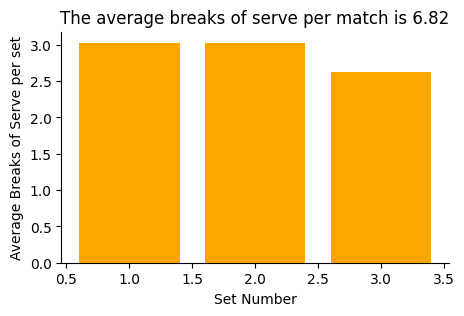

In [44]:
# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"pbp_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_point_by_point_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# Breaks_of_Serves=pd.concat([pd.read_parquet(f,columns=['match_id','set_id','game_id','serving','scoring']) for f in file_paths ],ignore_index=True)
# Breaks_of_Serves.drop_duplicates(inplace=True)
# Breaks_of_Serves.to_csv('./Breaks_of_Serves-Q17.csv')
Breaks_of_Serves=pd.read_csv('./Breaks_of_Serves-Q17.csv')
Breaks_of_Serves=Breaks_of_Serves.drop(columns='Unnamed: 0')
Breaks_of_Serves['Breaks_Occured']=Breaks_of_Serves['serving']!=Breaks_of_Serves['scoring']
Breaks_of_Serves['Breaks_Occured'].dropna()
Avg_Breaks_of_Serves=Breaks_of_Serves.groupby('match_id')['Breaks_Occured'].sum().mean()
print(f'The average number of breaks of serve per match is {round(Avg_Breaks_of_Serves,2)}')
breaks_per_set = Breaks_of_Serves.groupby(['match_id', 'set_id'])['Breaks_Occured'].sum()
breaks_per_set=pd.DataFrame(breaks_per_set)
breaks_per_set_df=pd.DataFrame(breaks_per_set.groupby('set_id')['Breaks_Occured'].mean())
breaks_per_set_df

fig,ax = plt.subplots(figsize=(5,3))
ax.bar(breaks_per_set_df.index, breaks_per_set_df['Breaks_Occured'],color='orange')

# Titles and labels
ax.set_title(f'The average breaks of serve per match is {round(Avg_Breaks_of_Serves,2)}')
ax.set_xlabel('Set Number')
ax.set_ylabel('Average Breaks of Serve per set')
ax.spines[['right','top']].set_visible(False)

# Show figure
plt.show()